In [3]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Save Model
import joblib

In [5]:
# Load dataset
df = pd.read_csv("data/churn_data.csv")  # No ../

# Display first 5 rows
df.head()

# Check data types & missing values
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df = df.dropna()  # Drop rows with missing values
# OR
df['ColumnName'].fillna(df['ColumnName'].mean(), inplace=True)  # Fill with mean

KeyError: 'ColumnName'

In [8]:
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [9]:
# Example: Fill missing values in 'MonthlyCharges' with its mean
df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean(), inplace=True)

/tmp/ipykernel_32703/1924757846.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean(), inplace=True)


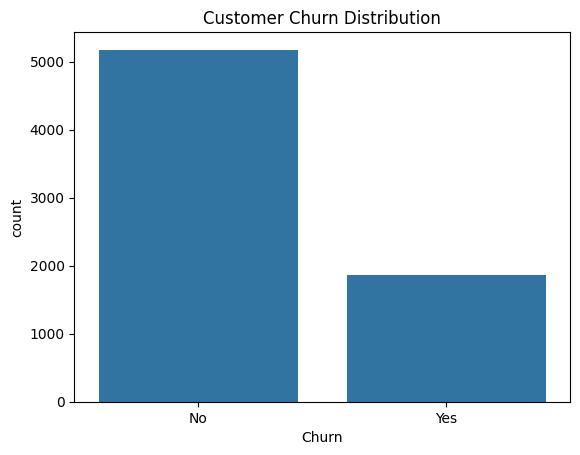

In [10]:
# Plot churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.show()

In [11]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: '7590-VHVEG'

<Figure size 1200x800 with 0 Axes>

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# Missing plt.show()

ValueError: could not convert string to float: '7590-VHVEG'

<Figure size 1200x800 with 0 Axes>

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()  # Add this line

ValueError: could not convert string to float: '7590-VHVEG'

<Figure size 1200x800 with 0 Axes>

In [14]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


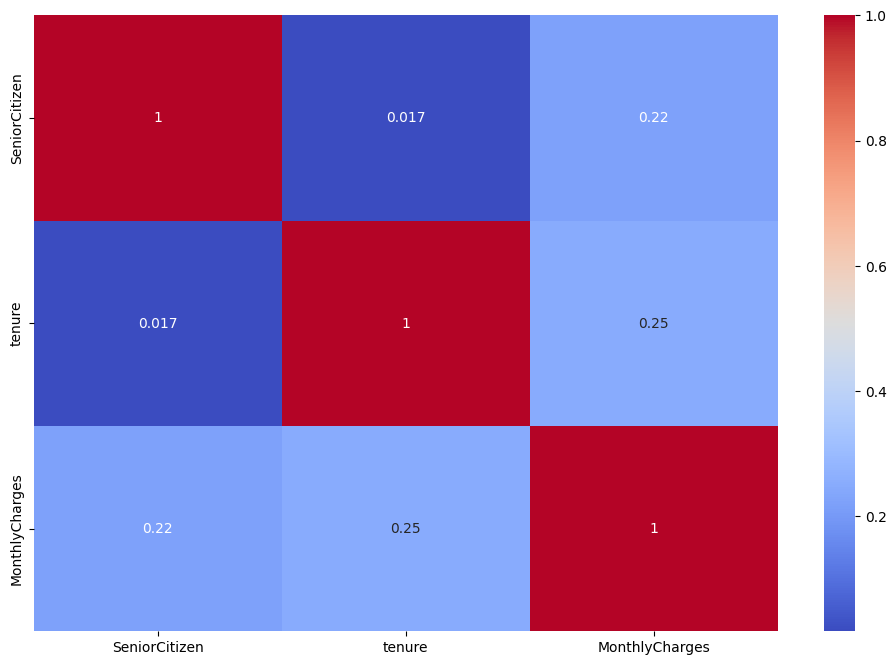

In [15]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [16]:
# Convert specific columns to numeric
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

In [17]:
from sklearn.preprocessing import LabelEncoder

# Example for a 'Gender' column
le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])

KeyError: 'Gender'

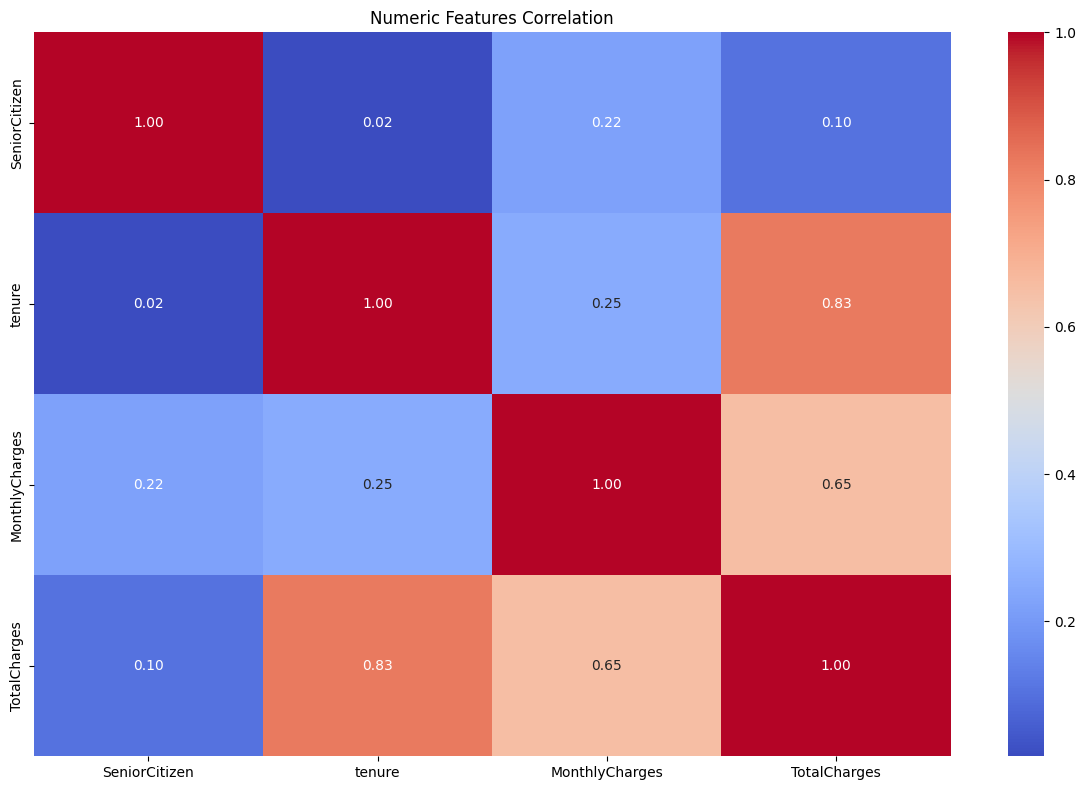

In [18]:
# 1. Convert relevant columns
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# 3. Plot
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Numeric Features Correlation")
plt.tight_layout()
plt.show()

In [19]:
df = pd.get_dummies(df, columns=['Gender', 'PaymentMethod'], drop_first=True)

KeyError: "['Gender'] not in index"

In [20]:
X = df.drop(['Churn', 'CustomerID'], axis=1)  # Features
y = df['Churn']  # Target variable

KeyError: "['CustomerID'] not found in axis"

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [22]:
print("Existing columns:", df.columns.tolist())
print("Existing index:", df.index.tolist()[:5])  # First 5 rows

Existing columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Existing index: [0, 1, 2, 3, 4]


In [23]:
# Correct way to drop existing columns
df.drop(columns=['customerID', 'PhoneService'], inplace=True)

# Safe method that won't error if columns don't exist
cols_to_drop = ['customerID', 'NonExistentColumn']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

In [24]:
# Correct column names (note capitalization)
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
df[numeric_cols].corr()  # Will work for these numeric columns

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
tenure,1.000000,0.247900,0.825880,0.016567
MonthlyCharges,0.247900,1.000000,0.651065,0.220173
TotalCharges,0.825880,0.651065,1.000000,0.102411
SeniorCitizen,0.016567,0.220173,0.102411,1.000000


In [25]:
# Convert to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NA values if needed
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

/tmp/ipykernel_32703/111605630.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


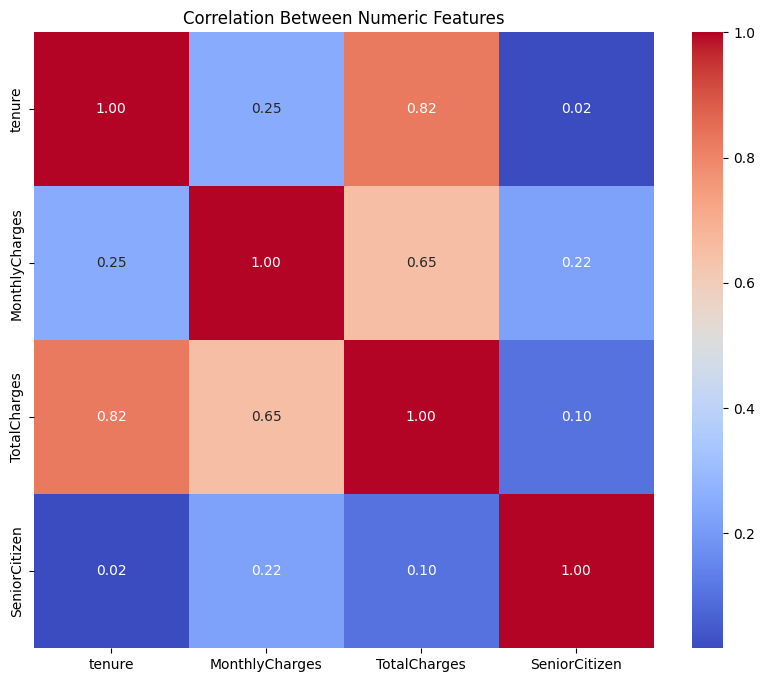

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']]

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numeric Features')
plt.show()

In [27]:
# Example for one column
df['gender_encoded'] = df['gender'].map({'Female': 0, 'Male': 1})

# For multiple categorical columns
categorical_cols = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn']
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [28]:
X = df.drop(['Churn', 'CustomerID'], axis=1)  # Features
y = df['Churn']  # Target variable

KeyError: "['CustomerID'] not found in axis"

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [30]:
# Correct version (note 'customerID' vs 'CustomerID')
X = df.drop(['Churn', 'customerID'], axis=1)  # Features
y = df['Churn']  # Target

KeyError: "['customerID'] not found in axis"

In [31]:
columns_to_drop = ['Churn', 'customerID']
missing = set(columns_to_drop) - set(df.columns)
if missing:
    print(f"Warning: These columns don't exist: {missing}")
    
# Safe drop
X = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [32]:
features = df.columns.difference(['Churn', 'customerID'])
X = df[features]
y = df['Churn']

In [33]:
# Check columns first
print("Available columns:", df.columns.tolist())

# Safe feature/target split
X = df.drop(columns=['Churn', 'customerID'])  # Features
y = df['Churn']  # Target

print(f"X shape: {X.shape}, y shape: {y.shape}")

Available columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_encoded']


KeyError: "['customerID'] not found in axis"